###  UNIFOR - Mestrado em Inteligência Artificial e Ciência de Dados
### Disciplina: Análise de Dados em Grafos
#### Professor: Raimir
#### Equipe: Maurício Brito, João David e Tiago Pontes 

### Conceitos

No âmbito da teoria dos grafos e da análise de redes, centralidade é uma medida de importância de um vértice em um grafo. Existem diferentes tipos de medidas de centralidade de um vértice num grafo que determinam a importância relativa, que permitem, por exemplo, estimar o quanto uma pessoa é influente dentro de uma rede social, o quão é importante uma sala dentro de um edifício e como é bem utilizada uma estrada dentro de uma rede urbana. Vários conceitos de centralidade foram primeiramente desenvolvidos na análise de redes sociais, e muitos dos termos usados para medir a centralidade refletem a sua origem sociológica.
Existem quatro medidas de centralidade que são amplamente utilizados na análise de rede: centralidade de grau, centralidade de intermediação, centralidade de proximidade e centralidade de vetor próprio.

**Centralidade de Grau**: É definido como o número de links incidentes em um nó. O grau pode ser interpretado como a probabilidade que o vértice tem de receber alguma informação da rede. Os valores de grau de centralidade são normalizados dividindo pelo grau máximo possível em um gráfico simples n-1 onde n é o número de nós em G.

**Centralidade de Proximidade**:Em grafos conectados existe uma distância natural métrica entre todos os pares de nós, definido pelo comprimento de seus caminhos mais curtos. O afastamento de um nó s é definido como a soma de suas distâncias para todos os outros nós, e sua proximidade é definida como o inverso do afastamento. Assim, quanto mais central é o nó, menor é a distância do seu total para todos os outros nós. Proximidade pode ser considerada como uma medida de rapidez, para determinar a velocidade que ela necessitará para difundir informações de s a todos os outros nós sequencialmente.

**Centralidade de Intermediação**: Centralidade de intermediação quantifica o número de vezes que um nó age como ponte ao longo do caminho mais curto entre dois outros nós.

**Centralidade de Autovetor**: É uma medida da influência de um nó numa rede. Ele atribui pontuações relativas a todos os nós da rede, baseada no conceito de que as ligações para os nós de alta pontuação contribuem mais para a pontuação do nó em questão do que ligações iguais a nós baixa pontuação. O sistema de PageRank do Google é uma variante da medida de centralidade de autovetor. Outra medida de centralidade relacionada é a centralidade de Katz.

**Centralidade de Katz e Sistema de PageRank**: A centralidade de Katz é uma generalização da centralidade de grau. Como a centralidade de grau mede o número de vizinhos diretos, a centralidade Katz mede o número de todos os nós que podem ser conectados através de um caminho, enquanto a contribuição de um nó distante é penalizado por um fator de atenuação.

Um problema potencial com a centralidade de Katz é o seguinte: se um nó com alta centralidade vincula muitos outros, todos os outros recebem alta centralidade. Em muitos casos, entretanto, significa menos se um nó for apenas um entre muitos a serem vinculados. A centralidade adquirida em virtude de receber um link de um nó importante deve ser diluída se o vértice importante for muito magnânimo com endossos.

O **PageRank** é um ajuste da centralidade de Katz que leva em consideração essa questão. Existem três fatores distintos que determinam o PageRank de um nó: (i) o número de links que ele recebe, (ii) a propensão do link dos linkers e (iii) a centralidade dos linkers. O primeiro fator não é surpreendente: quanto mais links um nó atrai, mais importante ele é percebido. Razoavelmente, o valor do endosso se deprecia proporcionalmente ao número de links emitidos pelo nó endossante: links vindos de nós parcimoniosos são mais valiosos do que aqueles emanados por perdulários. Finalmente, nem todos os nós são criados iguais: links de vértices importantes são mais valiosos do que links de vértices obscuros. Este método foi cunhado (e patenteado) por Sergey Brin e Larry Page.

Fonte: Wikipedia

#### Importa bibliotecas necessárias

In [25]:
import networkx as nx
from networkx.algorithms import bipartite
from networkx.drawing.layout import bipartite_layout
import matplotlib.pyplot as plt
from networkx.classes.function import density
from networkx.algorithms.centrality import degree_centrality, closeness_centrality, betweenness_centrality, eigenvector_centrality
from networkx.algorithms.link_analysis.pagerank_alg import pagerank
from networkx.algorithms import distance_measures
import operator

#### Função para ler arquivo txt para gerar o grafo

In [26]:
def ler_e_gera_grafo(file):
    G = nx.read_edgelist(file,create_using=nx.Graph(), nodetype = int)
    # Apresenta resumo do grafo
    str = nx.info(G).split('\n')
    print('---------------------------------------------')
    print('Grafo: ', file)
    print(str[2])
    print(str[3])
    
    print()
    print(str[4])
    graus_G = sorted(G.degree, key=lambda x: x[1], reverse=True)
    no_min_grau = graus_G[-1]
    no_max_grau = graus_G[0]
    print(f'O Nó {no_min_grau[0]} é o de menor grau ({no_min_grau[1]})')
    print(f'O Nó {no_max_grau[0]} é o de MAIOR grau ({no_max_grau[1]})')
    
    print()
    print(f'Density: {density(G)}')
    return G

### Função para calcular a Centralidade de Grau

In [42]:
def min_max_centralidade_grau(G):
    print()
    print('Centralidade de Grau')
    centralidade_grau = degree_centrality(G)
    no_min = min(centralidade_grau.items(), key=operator.itemgetter(1))[0]
    no_max = max(centralidade_grau.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} é o de mínima centralidade ({centralidade_grau[no_min]})')
    print(f'O Nó {no_max} é o de MÁXIMA centralidade ({centralidade_grau[no_max]})')

### Função para calcular a Centralidade de Proximidade

In [43]:
def min_max_centralidade_prox(G):
    print()
    print('Centralidade de Proximidade')
    centralidade_prox = closeness_centrality(G)
    no_min = min(centralidade_prox.items(), key=operator.itemgetter(1))[0]
    no_max = max(centralidade_prox.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} é o de mínima centralidade ({centralidade_prox[no_min]})')
    print(f'O Nó {no_max} é o de MÁXIMA centralidade ({centralidade_prox[no_max]})')

### Função para calcular a Centralidade de Intermediação

In [29]:
def min_max_centralidade_inter(G):
    print()
    print('Centralidade de Intermediação')
    k=int(0.01 * G.number_of_nodes())
    k=int(G.number_of_nodes())
    centralidade_inter = betweenness_centrality(G, k=k)
    no_min = min(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    no_max = max(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} é o de mínima centralidade ({centralidade_inter[no_min]})')
    print(f'O Nó {no_max} é o de MÁXIMA centralidade ({centralidade_inter[no_max]})')

### Função para calcular a Centralidade de Autovetor

In [ ]:
def min_max_centralidade_auto(G):
    print()
    print('Centralidade de Autovetor')
    if G.number_of_nodes() > 1000:
        k=int(0.01 * G.number_of_nodes())
    else:
        k=int(G.number_of_nodes())
    centralidade_inter = eigenvector_centrality(G)
    no_min = min(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    no_max = max(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} é o de mínima centralidade ({centralidade_inter[no_min]})')
    print(f'O Nó {no_max} é o de MÁXIMA centralidade ({centralidade_inter[no_max]})')

### Função para calcular a Centralidade de Page Rank

In [31]:
def min_max_centralidade_page(G):
    print()
    print('Centralidade de Page Rank')
    k=int(0.01 * G.number_of_nodes())
    k=int(G.number_of_nodes())
    centralidade_inter = pagerank(G)
    no_min = min(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    no_max = max(centralidade_inter.items(), key=operator.itemgetter(1))[0]
    print(f'O Nó {no_min} é o de mínima centralidade ({centralidade_inter[no_min]})')
    print(f'O Nó {no_max} é o de MÁXIMA centralidade ({centralidade_inter[no_max]})')

### Função para calcular Métricas de Distância

In [32]:
def metricas_distancia(G):
    print()
    print('Métricas de Distância')
    print(f'Excentricidade: {distance_measures.eccentricity(G)}')
    print(f'Raio: {distance_measures.radius(G)}')
    print(f'Diâmetro: {distance_measures.diameter(G)}')
    print(f'Centro: {distance_measures.center(G)}')
    print(f'Periferia: {distance_measures.periphery(G)}')

### Dataset NotreDame

In [ ]:
G1 = ler_e_gera_grafo("web-NotreDame.txt")
min_max_centralidade_grau(G1)
min_max_centralidade_prox(G1)
# min_max_centralidade_inter(G1)
# min_max_centralidade_auto(G1)
min_max_centralidade_page(G1)
# metricas_distancia(G1)

---------------------------------------------
Grafo:  web-NotreDame.txt
Number of nodes: 325729
Number of edges: 1117563

Average degree:   6.8619
O Nó 325722 é o de menor grau (1)
O Nó 12129 é o de MAIOR grau (10721)

Density: 2.1066408037288526e-05

Centralidade de Grau
O Nó 77 é o de mínima centralidade (3.0700461734944495e-06)
O Nó 12129 é o de MÁXIMA centralidade (0.03291396502603399)

Centralidae de Proximidade


### Dataset Google

In [ ]:
G2 = ler_e_gera_grafo("web-Google.txt")
min_max_centralidade_grau(G2)
min_max_centralidade_prox(G2)
min_max_centralidade_inter(G2)
min_max_centralidade_auto(G2)
min_max_centralidade_page(G2)
metricas_distancia(G2)

### Dataset BerkStan

In [ ]:
G3 = ler_e_gera_grafo("web-BerkStan.txt")
min_max_centralidade_grau(G3)
min_max_centralidade_prox(G3)
min_max_centralidade_inter(G3)
min_max_centralidade_auto(G3)
min_max_centralidade_page(G3)
metricas_distancia(G3)

### Dataset Stanford

In [ ]:
G4 = ler_e_gera_grafo("web-Stanford.txt")
min_max_centralidade_grau(G4)
min_max_centralidade_prox(G4)
min_max_centralidade_inter(G4)
min_max_centralidade_auto(G4)
min_max_centralidade_page(G4)
metricas_distancia(G4)

### Grafo Karatê Club

In [33]:
G5 = nx.karate_club_graph()
min_max_centralidade_grau(G5)
min_max_centralidade_prox(G5)
min_max_centralidade_inter(G5)
min_max_centralidade_auto(G5)
min_max_centralidade_page(G5)
metricas_distancia(G5)


Centralidae de Grau
O Nó 11 é o de mínima centralidade (0.030303030303030304)
O Nó 33 é o de MÁXIMA centralidade (0.5151515151515151)

Centralidae de Proximidade
O Nó 16 é o de mínima centralidade (0.28448275862068967)
O Nó 0 é o de MÁXIMA centralidade (0.5689655172413793)

Centralidae de Intermediação
O Nó 7 é o de mínima centralidade (0.0)
O Nó 0 é o de MÁXIMA centralidade (0.43763528138528146)

Centralidae de Autovetor
O Nó 16 é o de mínima centralidade (0.023634794260596875)
O Nó 33 é o de MÁXIMA centralidade (0.373371213013235)

Centralidae de Page Rank
O Nó 11 é o de mínima centralidade (0.009564916863537148)
O Nó 33 é o de MÁXIMA centralidade (0.1009179167487121)

Métricas de Distância
Excentricidade: {0: 3, 1: 3, 2: 3, 3: 3, 4: 4, 5: 4, 6: 4, 7: 4, 8: 3, 9: 4, 10: 4, 11: 4, 12: 4, 13: 3, 14: 5, 15: 5, 16: 5, 17: 4, 18: 5, 19: 3, 20: 5, 21: 4, 22: 5, 23: 5, 24: 4, 25: 4, 26: 5, 27: 4, 28: 4, 29: 5, 30: 4, 31: 3, 32: 4, 33: 4}
Raio: 3
Diâmetro: 5
Centro: [0, 1, 2, 3, 8, 13, 19, 

#### Mostra o grafo G

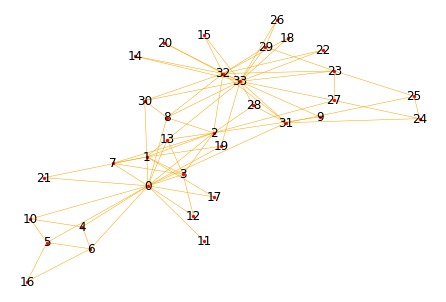

In [41]:
# fig = plt.figure(figsize=(8,8))
nx.draw(G5, pos=nx.spring_layout(G5), with_labels=True, node_color='red', node_size=5, edge_color='orange', width=0.5)
# plt.savefig("graph.png", dpi=300, facecolor='w', edgecolor='w',orientation='portrait',
#             format=None,transparent=False, bbox_inches=None, pad_inches=0.1)
plt.show()